### Diffusion Equation Backward Euler and Neumann Boundary Condition

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
class gas_canistor:
    def __init__(self, loc = 0.5, radius = 0.05, concentration = 1.0):
        self.radius = radius
        self.loc = loc
        self.lower_bound = self.loc - self.radius
        self.upper_bound = self.loc + self.radius
        self.concentration = concentration

def f(canistor: gas_canistor, x: np.array):
    return np.where((x >= canistor.lower_bound) & (x <= canistor.upper_bound), 1, 0)

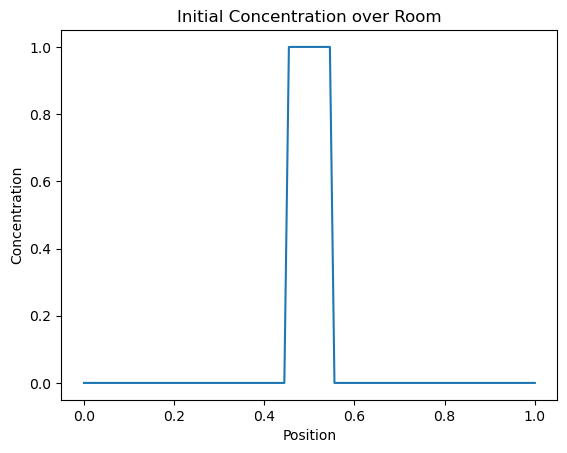

In [7]:
can_1 = gas_canistor()
x = np.linspace(0.0, 1.0, 100)
concentrations = f(can_1, x)

plt.plot(x, concentrations)
plt.title('Initial Concentration over Room')
plt.ylabel('Concentration')
plt.xlabel('Position')
plt.savefig("toy_problem_initial_concentration.svg")

In [8]:
class scrubber():
    def __init__(self, location, radius, efficiency):
        self.loc = location
        self.radius = radius
        self.efficiency = efficiency
        self.lower_bound = self.loc - self.radius
        self.upper_bound = self.loc + self.radius

def sink(scrub:scrubber, x, u):
    """
    loc: location of sink
    x: position
    cot: concentration
    """
    
    scrub_loc = np.where((x >= scrub.lower_bound) & (x <= scrub.upper_bound))
    u[scrub_loc] = (1 - scrub.efficiency) * u[scrub_loc]
    
    return u

In [59]:
scrub = scrubber(0.2, 0.05, 0.2)

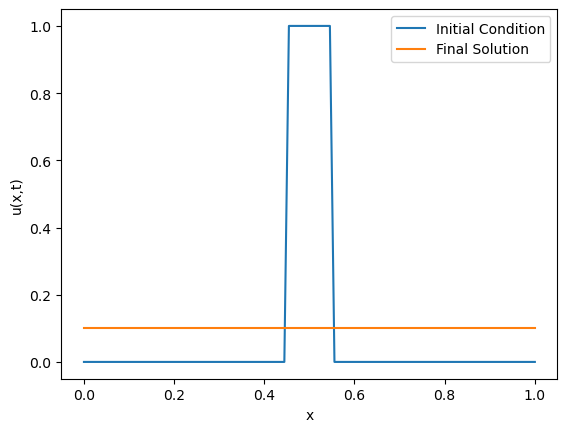

In [23]:
# Parameters
L = 1.0                 # Length of interval
T = 1.0                 # Total time
Nx = 100                # Number of spatial points
Nt = 100                # Number of time steps

dx = L / (Nx - 1)       # Spatial step size
dt = T / Nt             # Time step size
C = dt / dx**2 


x = np.linspace(0, L, Nx)

canistor = gas_canistor()
u_initial = f(canistor, x)



u = np.copy(u_initial)

U_tracked = np.zeros((Nt, Nx))
U_tracked[0, :] = u

A = np.zeros((Nx, Nx))

for i in range(1, Nx - 1):
    A[i, i - 1] = -C
    A[i, i] = 1 + 2 * C
    A[i, i + 1] = -C

A[0, 0] = 1 + 2 * C
A[0, 1] = -2 * C   
A[Nx - 1, Nx - 2] = -2 * C 
A[Nx - 1, Nx - 1] = 1 + 2 * C


for n in range(Nt - 1):
    u = np.linalg.solve(A, u)
    u = sink(scrub, x, u)
    U_tracked[n+1, :] = u
    

# Plotting the final solution
plt.plot(x, u_initial, label="Initial Condition")
plt.plot(x, u, label="Final Solution")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.legend()
plt.show()

In [55]:
U_tracked_x = np.copy(U_tracked)
U_tracked_y = np.copy(U_tracked)

/var/folders/0n/r629t0454rzffj5ldfgk8g1c0000gn/T/ipykernel_17441/2076833425.py:26: UserWarning: frames=<function generate_data at 0x11773ae80> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(fig, update, generate_data, blit=True, interval=1000)


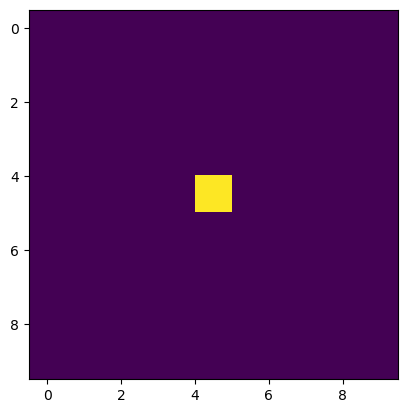

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Initialize the figure and axis
fig, ax = plt.subplots()

# Create an initial heatmap
A = np.random.rand(10, 10)  # Replace with your initial matrix
heatmap = ax.imshow(A, cmap='viridis', interpolation='nearest')

# Function to update the heatmap
def update(data):
    heatmap.set_data(data)
    return heatmap,

# Function to generate the next matrix (modify as per your update logic)
def generate_data():
    for i in range(Nt):
        x_curr = U_tracked_x[i,:, np.newaxis]
        y_curr = U_tracked_y[i,:, np.newaxis]
        new_A = x_curr @ y_curr.T
        yield new_A

# Create the animation
ani = animation.FuncAnimation(fig, update, generate_data, blit=True, interval=1000)

plt.show()